In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df=pd.read_csv('weather.csv')

In [4]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,01-01-2012,0.0,12.8,5.0,4.7,drizzle
1,02-01-2012,10.9,10.6,2.8,4.5,rain
2,03-01-2012,0.8,11.7,7.2,2.3,rain
3,04-01-2012,20.3,12.2,5.6,4.7,rain
4,05-01-2012,1.3,8.9,2.8,6.1,rain


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [6]:
subset=df.loc[:,'precipitation':'wind']

In [7]:
df1=subset

In [8]:
df1

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1
...,...,...,...,...
1456,8.6,4.4,1.7,2.9
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


In [9]:
x=df1

In [10]:
x


,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1
...,...,...,...,...
1456,8.6,4.4,1.7,2.9
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


In [11]:
y=df.iloc[:,5:].values

In [12]:
y

array([['drizzle'],
       ['rain'],
       ['rain'],
       ...,
       ['fog'],
       ['sun'],
       ['sun']], dtype=object)

In [13]:
from sklearn.model_selection import train_test_split


In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y.ravel(),test_size=0.2,random_state=0)

In [15]:

x_train

,precipitation,temp_max,temp_min,wind
646,6.9,13.9,7.8,3.0
92,0.0,16.7,4.4,3.1
818,14.0,11.7,7.2,5.1
302,10.9,15.6,10.0,4.9
1259,0.0,23.9,9.4,2.6
...,...,...,...,...
763,0.0,8.9,1.1,2.5
835,0.5,14.4,7.8,4.0
1216,0.0,18.3,8.9,3.7
559,0.0,26.1,11.1,3.1


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
st=StandardScaler()

In [18]:
x_train=st.fit_transform(x_train)

In [19]:
x_test=st.fit_transform(x_test)

In [20]:
x_train


array([[ 0.52001435, -0.34077338, -0.07596684, -0.18601731],
       [-0.45793396,  0.03914932, -0.74651473, -0.11786542],
       [ 1.52630899, -0.63928407, -0.19429882,  1.24517234],
       ...,
       [-0.45793396,  0.25624801,  0.14097513,  0.29104591],
       [-0.45793396,  1.3146041 ,  0.57485906, -0.11786542],
       [-0.03273904, -0.78853941, -0.19429882,  1.85853933]])

In [21]:
y_train

array(['rain', 'sun', 'rain', ..., 'sun', 'sun', 'rain'], dtype=object)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np


In [23]:
error=[]
for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i=knn.predict(x_test)
  error.append(np.mean(pred_i!=y_test))




In [24]:
import matplotlib.pyplot as plt

Minimum error  0.27986348122866894 at k=  16


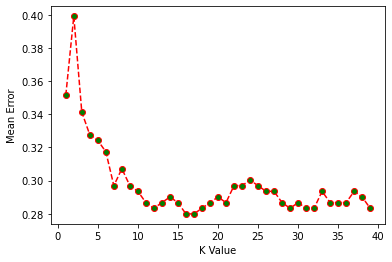

In [25]:
plt.plot(range(1,40),error,color='red',linestyle='dashed',marker='o',markerfacecolor='green')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error ",min(error),"at k= ",error.index(min(error))+1)

In [26]:
error

[0.3515358361774744,
 0.3993174061433447,
 0.3412969283276451,
 0.32764505119453924,
 0.3242320819112628,
 0.3174061433447099,
 0.29692832764505117,
 0.30716723549488056,
 0.29692832764505117,
 0.2935153583617747,
 0.28668941979522183,
 0.2832764505119454,
 0.28668941979522183,
 0.2901023890784983,
 0.28668941979522183,
 0.27986348122866894,
 0.27986348122866894,
 0.2832764505119454,
 0.28668941979522183,
 0.2901023890784983,
 0.28668941979522183,
 0.29692832764505117,
 0.29692832764505117,
 0.3003412969283277,
 0.29692832764505117,
 0.2935153583617747,
 0.2935153583617747,
 0.28668941979522183,
 0.2832764505119454,
 0.28668941979522183,
 0.2832764505119454,
 0.2832764505119454,
 0.2935153583617747,
 0.28668941979522183,
 0.28668941979522183,
 0.28668941979522183,
 0.2935153583617747,
 0.2901023890784983,
 0.2832764505119454]

In [27]:
classifier=KNeighborsClassifier(n_neighbors=16)

In [28]:
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=16)

In [29]:
y_pred=classifier.predict(x_test)

In [30]:
y_pred


array(['sun', 'rain', 'rain', 'sun', 'rain', 'rain', 'rain', 'rain',
       'sun', 'rain', 'sun', 'rain', 'sun', 'sun', 'sun', 'sun', 'sun',
       'rain', 'rain', 'rain', 'rain', 'rain', 'rain', 'sun', 'sun',
       'sun', 'sun', 'rain', 'sun', 'sun', 'rain', 'rain', 'rain', 'rain',
       'rain', 'sun', 'sun', 'rain', 'sun', 'rain', 'sun', 'rain', 'rain',
       'rain', 'sun', 'sun', 'sun', 'sun', 'sun', 'sun', 'sun', 'sun',
       'sun', 'rain', 'rain', 'sun', 'sun', 'rain', 'sun', 'rain', 'sun',
       'rain', 'sun', 'sun', 'sun', 'rain', 'sun', 'sun', 'sun', 'rain',
       'rain', 'sun', 'rain', 'sun', 'sun', 'sun', 'sun', 'sun', 'rain',
       'rain', 'sun', 'sun', 'rain', 'rain', 'rain', 'sun', 'sun', 'rain',
       'sun', 'rain', 'sun', 'sun', 'rain', 'sun', 'rain', 'sun', 'sun',
       'sun', 'sun', 'rain', 'rain', 'rain', 'sun', 'rain', 'rain',
       'rain', 'rain', 'rain', 'sun', 'sun', 'rain', 'sun', 'rain', 'sun',
       'sun', 'sun', 'sun', 'rain', 'rain', 'rain', 'rain'

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
confusion_matrix(y_test,y_pred)


array([[  0,   0,   1,   0,   9],
       [  0,   0,   4,   0,  25],
       [  0,   0, 105,   0,  18],
       [  0,   0,   3,   0,   3],
       [  0,   0,  19,   0, 106]], dtype=int64)

In [33]:
from sklearn import metrics

In [34]:
print("\nAccuracy Of KNN For The Given Dataset : ",metrics.accuracy_score(y_test,y_pred))


Accuracy Of KNNF For The Given Dataset :  0.7201365187713311
